In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [55]:
dask_df = pd.read_csv('C:/Users/mustakim.hossain/Desktop/DS Usecase/Practice/DS_Clustering/Raw/MFS_DATA.txt', sep='|')

In [56]:
dask_df.set_index(['CX'],inplace = True)

dask_df.head()

,CUST_AGE,AON_MONTH,WB_MONTH,LAST_EVENT_DAY,LAST_REFILL_DAY,LAST_MFS_DAY,TOT_MOB_REV,TOTAL_REFILL_AMOUNT,MFS_REFILL_AMOUNT,MAX_REFILL,...,TOTAL_REFILL_TICKET,PRE_REFILL_TICKET,TOT_REFILL_REV_P,OG_ACD,IC_ACD,PRE_RGB_DAYS_P,PRE_EVENT_DAYS_P,PRE_OG_DAYS_P,PRE_DATA_DAYS_P,HS_CHANGED
CX,,,,,,,,,,,,,,,,,,,,,
1830184300,28,139,0,0,5,5,259,277,20,97.0,...,40,99,0.9350,0.8916,1.1406,0.5862,1.0000,0.5357,1.25,0
1829061000,28,110,12,1,6,8,654,831,99,99.0,...,76,60,0.7870,1.9438,0.7441,2.2727,1.0345,1.0345,1.50,0
1843096900,41,100,32,0,1,15,163,214,20,39.0,...,19,20,0.7617,0.9952,0.9258,1.1111,1.0000,1.0345,0.00,0
1813152300,43,153,80,2,2,20,24,39,19,20.0,...,20,19,0.6154,1.2308,1.0000,1.7000,1.3529,1.7000,0.00,0
1815512500,28,139,31,0,6,6,376,479,479,99.0,...,80,79,0.7850,2.1157,1.2816,1.6667,1.0000,1.0000,0.00,0


In [83]:
dask_df_01=dask_df

dask_df_01.head()

,CUST_AGE,AON_MONTH,WB_MONTH,LAST_EVENT_DAY,LAST_REFILL_DAY,LAST_MFS_DAY,TOT_MOB_REV,TOTAL_REFILL_AMOUNT,MFS_REFILL_AMOUNT,MAX_REFILL,...,TOTAL_REFILL_TICKET,PRE_REFILL_TICKET,TOT_REFILL_REV_P,OG_ACD,IC_ACD,PRE_RGB_DAYS_P,PRE_EVENT_DAYS_P,PRE_OG_DAYS_P,PRE_DATA_DAYS_P,HS_CHANGED
CX,,,,,,,,,,,,,,,,,,,,,
1830184300,28,139,0,0,5,5,259,277,20,97.0,...,40,99,0.9350,0.8916,1.1406,0.5862,1.0000,0.5357,1.25,0
1829061000,28,110,12,1,6,8,654,831,99,99.0,...,76,60,0.7870,1.9438,0.7441,2.2727,1.0345,1.0345,1.50,0
1843096900,41,100,32,0,1,15,163,214,20,39.0,...,19,20,0.7617,0.9952,0.9258,1.1111,1.0000,1.0345,0.00,0
1813152300,43,153,80,2,2,20,24,39,19,20.0,...,20,19,0.6154,1.2308,1.0000,1.7000,1.3529,1.7000,0.00,0
1815512500,28,139,31,0,6,6,376,479,479,99.0,...,80,79,0.7850,2.1157,1.2816,1.6667,1.0000,1.0000,0.00,0


In [84]:
categorical_features = ['DEVICE_CATEGORY','THREEG','LTE','DUAL_SIM_IND','VAS_DEACTIVE','ADDBACK','HS_CHANGED']

continuous_features = ['CUST_AGE','AON_MONTH','WB_MONTH','LAST_EVENT_DAY','LAST_REFILL_DAY','LAST_MFS_DAY','TOT_MOB_REV',
'TOTAL_REFILL_AMOUNT','MFS_REFILL_AMOUNT','MAX_REFILL','MFS_REFILL_DAYS','RGB_DAYS','EVENT_DAYS','OG_DAYS','DATA_DAYS',
'CHURN_COUNT','ICMS_UPTAKE_COUNT','CC_COUNT','TOT_VC_REV_P','TOT_DATA_REV_P','TOT_VAS_REV_P','TOT_VC_INTL_OG_REV_P',
'TOT_VC_BUNDLE_REV_P','TOT_DATA_PPU_REV_P','TOT_DATA_BNDL_EL_REV_P','TOT_DATA_BNDL_USSD_REV_P','TOT_SMS_REV_P',
'DATA_VAS_REV_P','PRE_MOB_REV_P','PRE_VC_REV_P','PRE_DATA_REV_P','PRE_VAS_REV_P','PRE_OG_MOU_P','PRE_IC_MOU_P',
'PRE_DATA_VOL_P','D_01_TOT_MOB_REV_P','D_11_TOT_MOB_REV_P','D_21_TOT_MOB_REV_P','D_01_TOT_VC_REV_P','D_11_TOT_VC_REV_P',
'D_21_TOT_VC_REV_P','D_01_TOT_DATA_REV_P','D_11_TOT_DATA_REV_P','D_21_TOT_DATA_REV_P','D_01_TOT_VAS_REV_P',
'D_11_TOT_VAS_REV_P','D_21_TOT_VAS_REV_P','D_01_TOT_SMS_REV_P','D_11_TOT_SMS_REV_P','D_21_TOT_SMS_REV_P',
'D_01_TOT_RE_AMT_P','D_11_TOT_RE_AMT_P','D_21_TOT_RE_AMT_P','D_01_TOT_SC_RE_AMT_P','D_11_TOT_SC_RE_AMT_P',
'D_21_TOT_SC_RE_AMT_P','D_01_TOT_VC_OG_MOU_P','D_11_TOT_VC_OG_MOU_P','D_21_TOT_VC_OG_MOU_P','D_01_TOT_VC_IC_MOU_P',
'D_11_TOT_VC_IC_MOU_P','D_21_TOT_VC_IC_MOU_P','D_01_TOT_DATA_VOL_P','D_11_TOT_DATA_VOL_P','D_21_TOT_DATA_VOL_P',
'TOTAL_SC_REFILL_AMOUNT_P','TOTAL_REFILL_TICKET','PRE_REFILL_TICKET','TOT_REFILL_REV_P','OG_ACD','IC_ACD','PRE_RGB_DAYS_P',
'PRE_EVENT_DAYS_P','PRE_OG_DAYS_P','PRE_DATA_DAYS_P']

In [78]:
dask_df_01[continuous_features].describe()

,CUST_AGE,AON_MONTH,WB_MONTH,LAST_EVENT_DAY,LAST_REFILL_DAY,LAST_MFS_DAY,TOT_MOB_REV,TOTAL_REFILL_AMOUNT,MFS_REFILL_AMOUNT,MAX_REFILL,...,TOTAL_SC_REFILL_AMOUNT_P,TOTAL_REFILL_TICKET,PRE_REFILL_TICKET,TOT_REFILL_REV_P,OG_ACD,IC_ACD,PRE_RGB_DAYS_P,PRE_EVENT_DAYS_P,PRE_OG_DAYS_P,PRE_DATA_DAYS_P
count,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,...,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06,1.009386e+06
mean,3.782554e+01,5.265018e+01,1.864074e+01,8.504527e-01,5.464021e+00,1.088973e+01,2.280826e+02,2.856773e+02,1.144051e+02,7.316803e+01,...,5.388390e-02,3.956721e+01,3.716976e+01,8.155324e-01,1.788505e+00,1.757571e+00,1.079667e+00,9.736240e-01,1.063166e+00,7.009760e-01
std,1.076400e+01,4.660897e+01,2.477911e+01,3.068057e+00,6.673432e+00,8.651164e+00,2.643260e+02,3.319303e+02,1.871532e+02,8.019661e+01,...,1.474823e-01,3.943489e+01,4.055081e+01,4.568394e-01,1.510740e+00,1.466391e+00,1.141280e+00,6.301151e-01,1.277027e+00,1.598771e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+01,1.700000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,6.300000e+01,7.900000e+01,2.200000e+01,2.900000e+01,...,0.000000e+00,2.000000e+01,1.900000e+01,7.533000e-01,9.796000e-01,8.808000e-01,6.552000e-01,9.000000e-01,5.790000e-01,0.000000e+00
50%,3.600000e+01,3.400000e+01,5.000000e+00,0.000000e+00,3.000000e+00,9.000000e+00,1.450000e+02,1.830000e+02,5.000000e+01,5.000000e+01,...,0.000000e+00,2.900000e+01,2.800000e+01,7.973000e-01,1.457400e+00,1.349550e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,4.400000e+01,8.300000e+01,3.400000e+01,0.000000e+00,8.000000e+00,1.800000e+01,2.990000e+02,3.730000e+02,1.190000e+02,9.600000e+01,...,0.000000e+00,4.700000e+01,4.500000e+01,8.500000e-01,2.200000e+00,2.230800e+00,1.181800e+00,1.034500e+00,1.150000e+00,1.000000e+00
max,7.000000e+01,2.160000e+02,1.180000e+02,2.900000e+01,2.900000e+01,2.900000e+01,2.518800e+04,3.380500e+04,2.175000e+04,7.400000e+03,...,1.000000e+00,1.500000e+03,2.000000e+03,1.616000e+02,1.000000e+02,5.300000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01


In [85]:
for col in categorical_features:
    dummies = pd.get_dummies(dask_df_01[col], prefix=col)
    dask_df_01 = pd.concat([dask_df_01, dummies], axis=1)
    dask_df_01.drop(col, axis=1, inplace=True)
    
dask_df_01.head()

,CUST_AGE,AON_MONTH,WB_MONTH,LAST_EVENT_DAY,LAST_REFILL_DAY,LAST_MFS_DAY,TOT_MOB_REV,TOTAL_REFILL_AMOUNT,MFS_REFILL_AMOUNT,MAX_REFILL,...,DUAL_SIM_IND_1,DUAL_SIM_IND_2,DUAL_SIM_IND_3,DUAL_SIM_IND_4,VAS_DEACTIVE_0,VAS_DEACTIVE_1,ADDBACK_0,ADDBACK_1,HS_CHANGED_0,HS_CHANGED_1
CX,,,,,,,,,,,,,,,,,,,,,
1830184300,28,139,0,0,5,5,259,277,20,97.0,...,0,1,0,0,1,0,1,0,1,0
1829061000,28,110,12,1,6,8,654,831,99,99.0,...,0,1,0,0,0,1,1,0,1,0
1843096900,41,100,32,0,1,15,163,214,20,39.0,...,0,1,0,0,0,1,1,0,1,0
1813152300,43,153,80,2,2,20,24,39,19,20.0,...,0,1,0,0,1,0,1,0,1,0
1815512500,28,139,31,0,6,6,376,479,479,99.0,...,1,0,0,0,1,0,1,0,1,0


In [86]:
mms = MinMaxScaler()
mms.fit(dask_df_01)
dask_df_01 = pd.DataFrame(mms.transform(dask_df_01),index=dask_df_01.index, columns=dask_df_01.columns) 

dask_df_01.head()

,CUST_AGE,AON_MONTH,WB_MONTH,LAST_EVENT_DAY,LAST_REFILL_DAY,LAST_MFS_DAY,TOT_MOB_REV,TOTAL_REFILL_AMOUNT,MFS_REFILL_AMOUNT,MAX_REFILL,...,DUAL_SIM_IND_1,DUAL_SIM_IND_2,DUAL_SIM_IND_3,DUAL_SIM_IND_4,VAS_DEACTIVE_0,VAS_DEACTIVE_1,ADDBACK_0,ADDBACK_1,HS_CHANGED_0,HS_CHANGED_1
CX,,,,,,,,,,,,,,,,,,,,,
1830184300,0.400000,0.643519,0.000000,0.000000,0.172414,0.172414,0.010283,0.008194,0.000828,0.013108,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1829061000,0.400000,0.509259,0.101695,0.034483,0.206897,0.275862,0.025965,0.024582,0.004460,0.013378,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1843096900,0.585714,0.462963,0.271186,0.000000,0.034483,0.517241,0.006471,0.006330,0.000828,0.005270,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1813152300,0.614286,0.708333,0.677966,0.068966,0.068966,0.689655,0.000953,0.001154,0.000782,0.002703,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1815512500,0.400000,0.643519,0.262712,0.000000,0.206897,0.206897,0.014928,0.014170,0.021933,0.013378,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


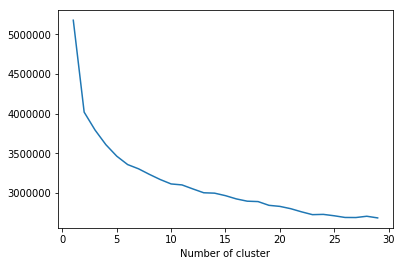

In [87]:
sse={}

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dask_df_01)
    dask_df_01['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [89]:
dask_df_01=dask_df_01.drop(['clusters'],axis = 1)
dask_df_01.head()

,CUST_AGE,AON_MONTH,WB_MONTH,LAST_EVENT_DAY,LAST_REFILL_DAY,LAST_MFS_DAY,TOT_MOB_REV,TOTAL_REFILL_AMOUNT,MFS_REFILL_AMOUNT,MAX_REFILL,...,DUAL_SIM_IND_1,DUAL_SIM_IND_2,DUAL_SIM_IND_3,DUAL_SIM_IND_4,VAS_DEACTIVE_0,VAS_DEACTIVE_1,ADDBACK_0,ADDBACK_1,HS_CHANGED_0,HS_CHANGED_1
CX,,,,,,,,,,,,,,,,,,,,,
1830184300,0.400000,0.643519,0.000000,0.000000,0.172414,0.172414,0.010283,0.008194,0.000828,0.013108,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1829061000,0.400000,0.509259,0.101695,0.034483,0.206897,0.275862,0.025965,0.024582,0.004460,0.013378,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1843096900,0.585714,0.462963,0.271186,0.000000,0.034483,0.517241,0.006471,0.006330,0.000828,0.005270,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1813152300,0.614286,0.708333,0.677966,0.068966,0.068966,0.689655,0.000953,0.001154,0.000782,0.002703,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1815512500,0.400000,0.643519,0.262712,0.000000,0.206897,0.206897,0.014928,0.014170,0.021933,0.013378,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [90]:
kmeans = KMeans(n_clusters=23, max_iter=1000).fit(dask_df_01)
dask_df_01['clusters'] = kmeans.labels_

In [92]:
dask_df_01.head()

,CUST_AGE,AON_MONTH,WB_MONTH,LAST_EVENT_DAY,LAST_REFILL_DAY,LAST_MFS_DAY,TOT_MOB_REV,TOTAL_REFILL_AMOUNT,MFS_REFILL_AMOUNT,MAX_REFILL,...,DUAL_SIM_IND_2,DUAL_SIM_IND_3,DUAL_SIM_IND_4,VAS_DEACTIVE_0,VAS_DEACTIVE_1,ADDBACK_0,ADDBACK_1,HS_CHANGED_0,HS_CHANGED_1,clusters
CX,,,,,,,,,,,,,,,,,,,,,
1830184300,0.400000,0.643519,0.000000,0.000000,0.172414,0.172414,0.010283,0.008194,0.000828,0.013108,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5
1829061000,0.400000,0.509259,0.101695,0.034483,0.206897,0.275862,0.025965,0.024582,0.004460,0.013378,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,12
1843096900,0.585714,0.462963,0.271186,0.000000,0.034483,0.517241,0.006471,0.006330,0.000828,0.005270,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,8
1813152300,0.614286,0.708333,0.677966,0.068966,0.068966,0.689655,0.000953,0.001154,0.000782,0.002703,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,9
1815512500,0.400000,0.643519,0.262712,0.000000,0.206897,0.206897,0.014928,0.014170,0.021933,0.013378,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2


In [101]:
dask_df_Final = pd.merge(dask_df, dask_df_01[['clusters']], on='CX')
dask_df_Final.head()

,CUST_AGE,AON_MONTH,WB_MONTH,LAST_EVENT_DAY,LAST_REFILL_DAY,LAST_MFS_DAY,TOT_MOB_REV,TOTAL_REFILL_AMOUNT,MFS_REFILL_AMOUNT,MAX_REFILL,...,PRE_REFILL_TICKET,TOT_REFILL_REV_P,OG_ACD,IC_ACD,PRE_RGB_DAYS_P,PRE_EVENT_DAYS_P,PRE_OG_DAYS_P,PRE_DATA_DAYS_P,HS_CHANGED,clusters
CX,,,,,,,,,,,,,,,,,,,,,
1830184300,28,139,0,0,5,5,259,277,20,97.0,...,99,0.9350,0.8916,1.1406,0.5862,1.0000,0.5357,1.25,0,5
1829061000,28,110,12,1,6,8,654,831,99,99.0,...,60,0.7870,1.9438,0.7441,2.2727,1.0345,1.0345,1.50,0,12
1843096900,41,100,32,0,1,15,163,214,20,39.0,...,20,0.7617,0.9952,0.9258,1.1111,1.0000,1.0345,0.00,0,8
1813152300,43,153,80,2,2,20,24,39,19,20.0,...,19,0.6154,1.2308,1.0000,1.7000,1.3529,1.7000,0.00,0,9
1815512500,28,139,31,0,6,6,376,479,479,99.0,...,79,0.7850,2.1157,1.2816,1.6667,1.0000,1.0000,0.00,0,2


In [105]:
pd.DataFrame(dask_df_Final.describe()).to_csv('DS_Clustering_des.csv')
pd.DataFrame(dask_df_Final.groupby(['clusters']).describe()).to_csv('DS_Clustering_des_01.csv')

In [104]:
dask_df_Final.describe()

,CUST_AGE,AON_MONTH,WB_MONTH,LAST_EVENT_DAY,LAST_REFILL_DAY,LAST_MFS_DAY,TOT_MOB_REV,TOTAL_REFILL_AMOUNT,MFS_REFILL_AMOUNT,MAX_REFILL,...,PRE_REFILL_TICKET,TOT_REFILL_REV_P,OG_ACD,IC_ACD,PRE_RGB_DAYS_P,PRE_EVENT_DAYS_P,PRE_OG_DAYS_P,PRE_DATA_DAYS_P,HS_CHANGED,clusters
count,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,...,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06,1.009396e+06
mean,3.782549e+01,5.265012e+01,1.864057e+01,8.504442e-01,5.463974e+00,1.088970e+01,2.280856e+02,2.856812e+02,1.144057e+02,7.316819e+01,...,3.716981e+01,8.155319e-01,1.788504e+00,1.757566e+00,1.079668e+00,9.736246e-01,1.063166e+00,7.009703e-01,1.942112e-01,9.973641e+00
std,1.076396e+01,4.660882e+01,2.477905e+01,3.068043e+00,6.673416e+00,8.651173e+00,2.643296e+02,3.319349e+02,1.871525e+02,8.019638e+01,...,4.055063e+01,4.568372e-01,1.510736e+00,1.466385e+00,1.141275e+00,6.301120e-01,1.277020e+00,1.598764e+00,3.955924e-01,6.109683e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+01,1.700000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,6.300000e+01,7.900000e+01,2.200000e+01,2.900000e+01,...,1.900000e+01,7.533000e-01,9.796000e-01,8.808000e-01,6.552000e-01,9.000000e-01,5.790000e-01,0.000000e+00,0.000000e+00,5.000000e+00
50%,3.600000e+01,3.400000e+01,5.000000e+00,0.000000e+00,3.000000e+00,9.000000e+00,1.450000e+02,1.830000e+02,5.000000e+01,5.000000e+01,...,2.800000e+01,7.973000e-01,1.457400e+00,1.349600e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
75%,4.400000e+01,8.300000e+01,3.400000e+01,0.000000e+00,8.000000e+00,1.800000e+01,2.990000e+02,3.730000e+02,1.190000e+02,9.600000e+01,...,4.500000e+01,8.500000e-01,2.200000e+00,2.230800e+00,1.181800e+00,1.034500e+00,1.150000e+00,1.000000e+00,0.000000e+00,1.500000e+01
max,7.000000e+01,2.160000e+02,1.180000e+02,2.900000e+01,2.900000e+01,2.900000e+01,2.518800e+04,3.380500e+04,2.175000e+04,7.400000e+03,...,2.000000e+03,1.616000e+02,1.000000e+02,5.300000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,1.000000e+00,2.200000e+01


In [103]:
dask_df_Final.groupby(['clusters']).describe()

ADDBACK                                              AON_MONTH  \
             count      mean       std  min  25%  50%  75%  max     count   
clusters                                                                    
0          13371.0  0.118091  0.322728  0.0  0.0  0.0  0.0  1.0   13371.0   
1          66407.0  0.002500  0.049935  0.0  0.0  0.0  0.0  1.0   66407.0   
2          51059.0  0.006169  0.078303  0.0  0.0  0.0  0.0  1.0   51059.0   
3          55898.0  0.009016  0.094527  0.0  0.0  0.0  0.0  1.0   55898.0   
4          18775.0  0.029614  0.169524  0.0  0.0  0.0  0.0  1.0   18775.0   
5          74179.0  0.004112  0.063991  0.0  0.0  0.0  0.0  1.0   74179.0   
6          34138.0  0.004335  0.065701  0.0  0.0  0.0  0.0  1.0   34138.0   
7          50775.0  0.008311  0.090787  0.0  0.0  0.0  0.0  1.0   50775.0   
8         146812.0  0.001178  0.034307  0.0  0.0  0.0  0.0  1.0  146812.0   
9          36374.0  0.023011  0.149940  0.0  0.0  0.0  0.0  1.0   36374.0   
10         27128.0  0.099160  0.298882  0.0  0.0  0.0  0.0  1.0   27128.0   
11         36207.0  0.017234  0.130145  0.0  0.0  0.0  0.0  1.0   36207.0   
12         70762.0  0.005526  0.074129  0.0  0.0  0.0  0.0  1.0   70762.0   
13         28557.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   28557.0   
14         25031.0  0.036874  0.188457  0.0  0.0  0.0  0.0  1.0   25031.0   
15         22390.0  0.997990  0.044787  0.0  1.0  1.0  1.0  1.0   22390.0   
16         55808.0  0.001810  0.042503  0.0  0.0  0.0  0.0  1.0   55808.0   
17         63780.0  0.002117  0.045959  0.0  0.0  0.0  0.0  1.0   63780.0   
18         26745.0  0.004150  0.064290  0.0  0.0  0.0  0.0  1.0   26745.0   
19         24546.0  0.458934  0.498321  0.0  0.0  0.0  1.0  1.0   24546.0   
20         11811.0  0.052917  0.223877  0.0  0.0  0.0  0.0  1.0   11811.0   
21         28940.0  0.117588  0.322125  0.0  0.0  0.0  0.0  1.0   28940.0   
22         39903.0  0.009423  0.096614  0.0  0.0  0.0  0.0  1.0   39903.0   

                     ...   VAS_DEACTIVE       WB_MONTH                        \
               mean  ...            75%  max     count       mean        std   
clusters             ...                                                       
0         50.229527  ...            0.0  1.0   13371.0  15.429661  21.332543   
1         50.074314  ...            0.0  1.0   66407.0  20.077959  25.398480   
2         63.305568  ...            0.0  1.0   51059.0  19.804579  26.545180   
3         47.293070  ...            0.0  1.0   55898.0  19.659397  24.469053   
4         44.920692  ...            0.0  1.0   18775.0  18.770812  24.241137   
5         50.213686  ...            0.0  1.0   74179.0  18.908775  24.505377   
6         44.251567  ...            0.0  1.0   34138.0  19.445457  24.265738   
7         56.168804  ...            0.0  1.0   50775.0  20.438740  25.840793   
8         61.281196  ...            0.0  1.0  146812.0  20.585075  26.290883   
9         49.611481  ...            0.0  1.0   36374.0  19.043548  24.393076   
10        46.998231  ...            0.0  1.0   27128.0  15.749963  21.310726   
11        45.150385  ...            0.0  1.0   36207.0  17.992267  23.931157   
12        64.059481  ...            0.0  1.0   70762.0  20.170275  26.333469   
13        36.060476  ...            0.0  1.0   28557.0   7.204293  15.010980   
14        41.106508  ...            0.0  1.0   25031.0  17.889577  23.428025   
15        40.094283  ...            0.0  1.0   22390.0   7.249442  14.840227   
16        44.402111  ...            0.0  1.0   55808.0  19.204254  24.399005   
17        62.523973  ...            0.0  1.0   63780.0  20.803418  26.631093   
18        57.574350  ...            0.0  1.0   26745.0  20.681062  25.955761   
19        44.872240  ...            0.0  1.0   24546.0  10.600627  18.251858   
20        53.360850  ...            0.0  1.0   11811.0  19.175599  24.837187   
21        41.881997  ...            0.0  1.0   28940.0  15.191396  21.074496   
22      

In [106]:
dask_df_non_mfs = pd.read_csv('C:/Users/mustakim.hossain/Desktop/DS Usecase/Practice/DS_Clustering/Raw/NON_MFS_DATA.txt', sep='|')

In [107]:
pd.DataFrame(dask_df_non_mfs.describe()).to_csv('DS_Clustering_des_02.csv')